In [2]:
import pandas as pd
import os

path = './2st/'
modules = pd.DataFrame()
for f in os.listdir(path):
    module = pd.read_excel(path+f, index_col = 0)
    modules = pd.concat([modules,module])

In [3]:
rack = pd.read_excel("(220406)KETI 시험의뢰#1_2차시험_랙 데이터.xlsx", index_col = 0)

In [11]:
modules.columns

Index(['Module', 'Cell_Voltage1', 'Cell_Voltage2', 'Cell_Voltage3',
       'Cell_Voltage4', 'Cell_Voltage5', 'Cell_Voltage6', 'Cell_Voltage7',
       'Cell_Voltage8', 'Cell_Voltage9', 'Cell_Voltage10', 'Cell_Voltage11',
       'Cell_Voltage12', 'MIN_CELL_TEMP', 'MAX_CELL_TEMP', 'MIN_CELL_VOLT',
       'MIN_CELL_Volt_Pt', 'MAX_CELL_VOLT', 'MAX_CELL_Volt_Pt', 'Voltage'],
      dtype='object')

1 3.13
2 3.156
3 3.141
4 3.19
5 3.182
6 3.176
7 3.174
8 3.172
9 3.176
10 3.199
11 3.192
12 3.188
13 3.197
14 3.183
15 3.183
16 3.171
17 3.191


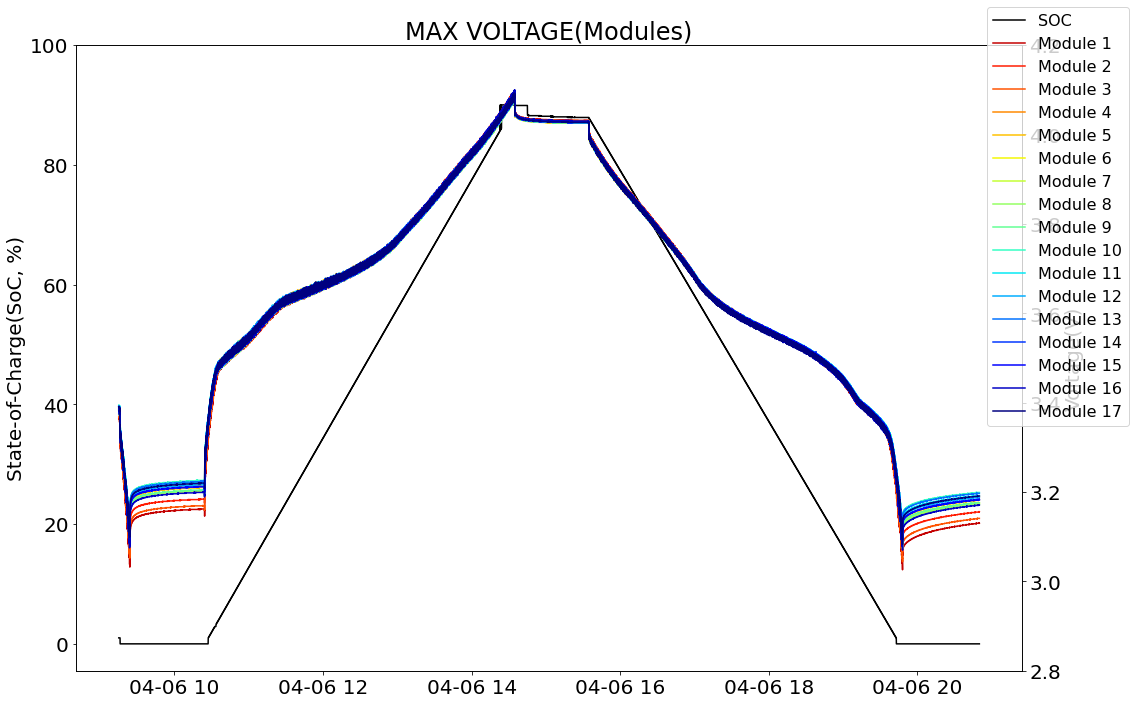

In [15]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

cmap = plt.get_cmap('jet_r')

def plot_max_voltage_modules(modules):
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        ax2.plot(rack.index, temp["MAX_CELL_VOLT"][:-1], label=f"Module {i}", color = cmap(float(i)/17))
        print(i, temp["MAX_CELL_VOLT"][-2])
    ax1.set_title("MAX VOLTAGE(Modules)")
    
## Module별 최대 전압 출력
    
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()

ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])
ax2.set_ylim([2.8,4.2])

plot_max_voltage_modules(modules)

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
plt.savefig("./2st_fig/rack/rack Max Voltage to Modules.jpg", dpi=256)

1 3.107
2 3.114
3 3.109
4 3.139
5 3.148
6 3.126
7 3.136
8 3.125
9 3.138
10 3.153
11 3.145
12 3.132
13 3.135
14 3.142
15 3.156
16 3.11
17 3.127


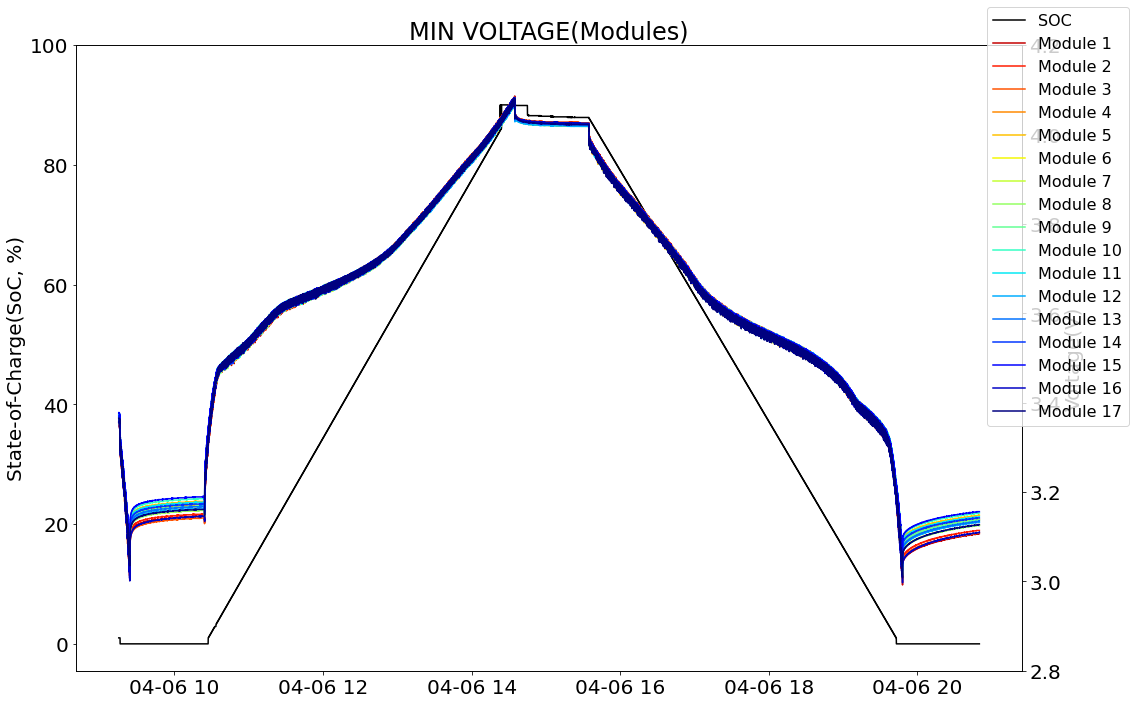

In [16]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

cmap = plt.get_cmap('jet_r')

def plot_min_voltage_modules(modules):
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        ax2.plot(rack.index, temp["MIN_CELL_VOLT"][:-1], label=f"Module {i}", color = cmap(float(i)/17))
        print(i, temp["MIN_CELL_VOLT"][-2])
    ax1.set_title("MIN VOLTAGE(Modules)")

## Module별 최소 전압 출력
    
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()

ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])
ax2.set_ylim([2.8,4.2])

plot_min_voltage_modules(modules)

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
plt.savefig("./2st_fig/rack/rack Min Voltage to Modules.jpg", dpi=256)

1 3.119925
2 3.129491666666667
3 3.1242916666666667
4 3.1687749999999997
5 3.1659916666666668
6 3.1593249999999995
7 3.1585
8 3.1516
9 3.1580250000000003
10 3.174875
11 3.1687166666666666
12 3.1707916666666662
13 3.1616749999999993
14 3.1638666666666673
15 3.1686083333333337
16 3.1252
17 3.1666333333333334


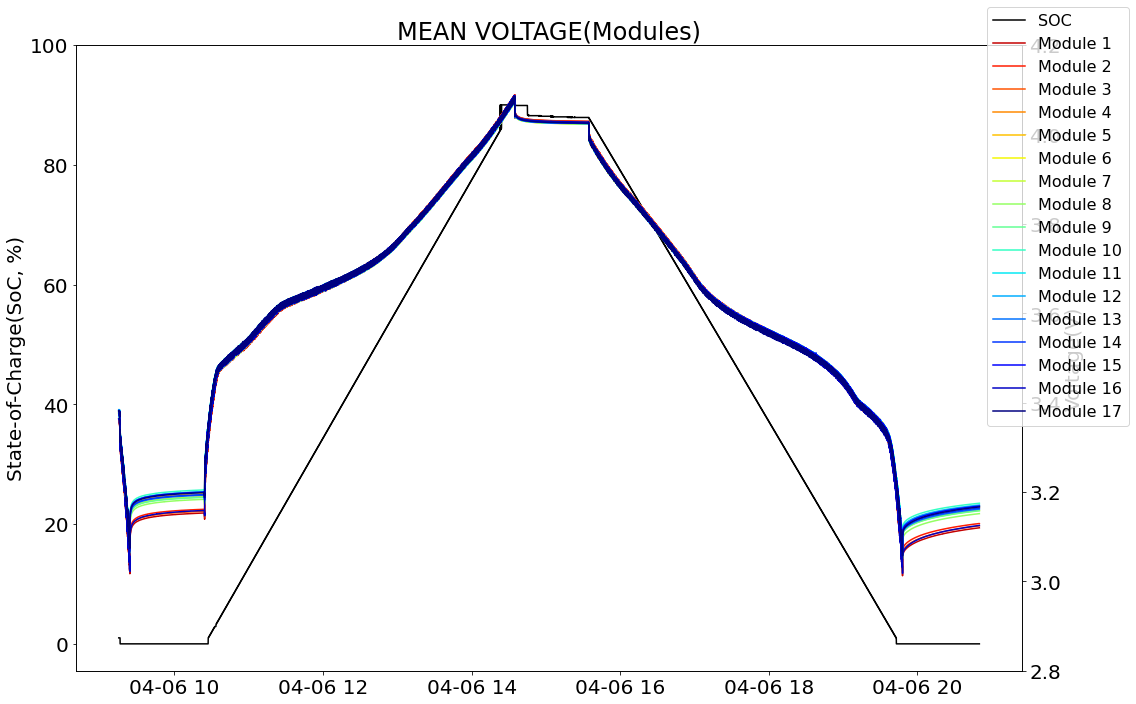

In [17]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

cmap = plt.get_cmap('jet_r')

def plot_mean_voltage_modules(modules):
    module_mean_voltage = pd.DataFrame()
    cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[cell_voltages].mean(axis=1)
        ax2.plot(rack.index, module_mean[:-1], label=f"Module {i}", color = cmap(float(i)/17))
        print(i, module_mean[-2])
    ax1.set_title("MEAN VOLTAGE(Modules)")
    
## Module별 평균 전압 출력
    
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()

ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])
ax2.set_ylim([2.8,4.2])

plot_mean_voltage_modules(modules)

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
plt.savefig("./2st_fig/rack/rack Mean Voltage to Modules.jpg", dpi=256)

1 35.349999999999994
2 36.650000000000006
3 36.55
4 36.45
5 36.150000000000006
6 35.95
7 35.8
8 35.95
9 35.75
10 35.7
11 35.35
12 35.25
13 34.85
14 34.45
15 34.25
16 33.650000000000006
17 31.75


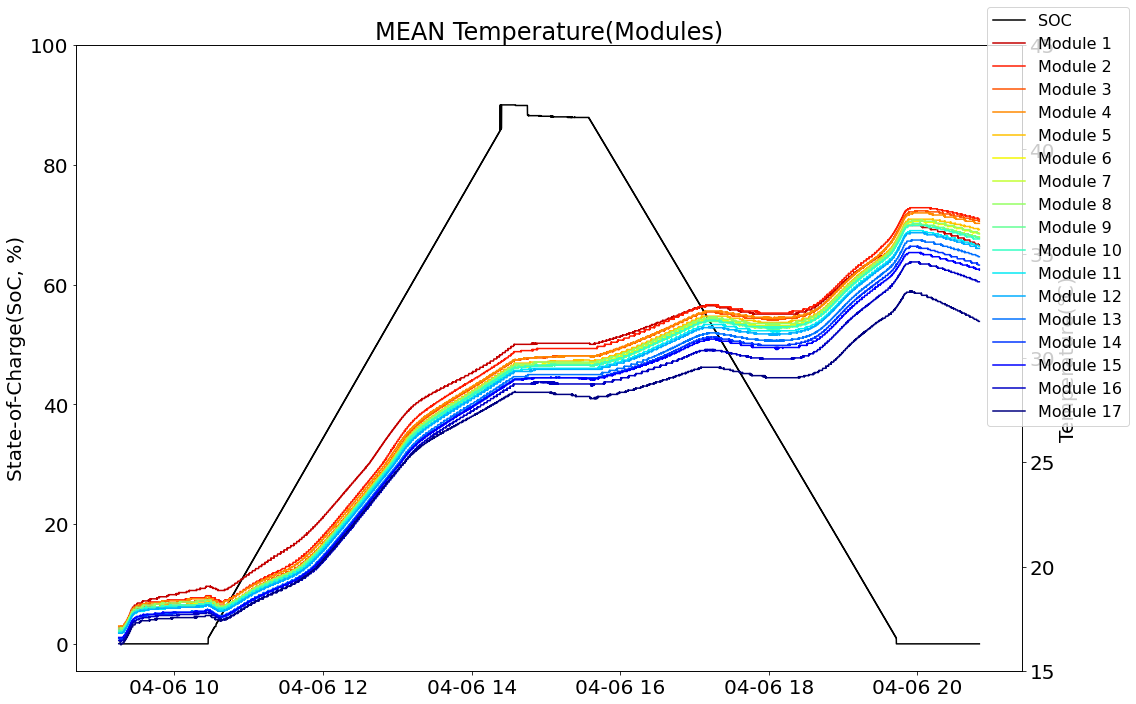

In [19]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

cmap = plt.get_cmap('jet_r')

def plot_mean_temperature_modules(modules):
    module_mean_temperature = pd.DataFrame()
    cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[['MIN_CELL_TEMP','MAX_CELL_TEMP']].mean(axis=1)
        ax2.plot(rack.index, module_mean[:-1], label=f"Module {i}", color = cmap(float(i)/17))
        print(i, module_mean[-2])
    ax1.set_title("MEAN Temperature(Modules)")
    
## Module별 평균 온도 출력
    
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()

ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Temperature(℃)")
ax2.set_yticks([i for i in range(15,46,5)])
ax2.set_ylim([15,45])

plot_mean_temperature_modules(modules)

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
plt.savefig("./2st_fig/rack/rack Temperature to Modules.jpg", dpi=256)